In [11]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
#Get stock symbols- FAANG

assets=['META','AMZN','AAPL','NFLX','GOOG']


In [13]:
#ASSIGN WEIGHTS TO OUR STOCKS. Same weights to all

weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [14]:
#Get the stocks/portfolio start date and end date(today)
stockstartdate='2020-01-01'
today=datetime.today().strftime('%Y-%m-%d')


In [15]:
#create a data frame to store adjusted close price of stocks
df= pd.DataFrame()
#store the adjusted close price into df

for stock in assets:
    df[stock] = yf.download(stock, start=stockstartdate, end=today)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-02,209.779999,94.900497,73.059441,329.809998,68.368500
2020-01-03,208.669998,93.748497,72.349136,325.899994,68.032997
2020-01-06,212.600006,95.143997,72.925659,335.829987,69.710503
2020-01-07,213.059998,95.343002,72.582649,330.750000,69.667000
2020-01-08,215.220001,94.598503,73.750237,339.260010,70.216003
...,...,...,...,...,...
2024-02-07,469.589996,170.529999,189.168625,559.299988,146.679993
2024-02-08,470.000000,169.839996,188.080017,558.530029,147.220001
2024-02-09,468.109985,174.449997,188.850006,561.320007,150.220001


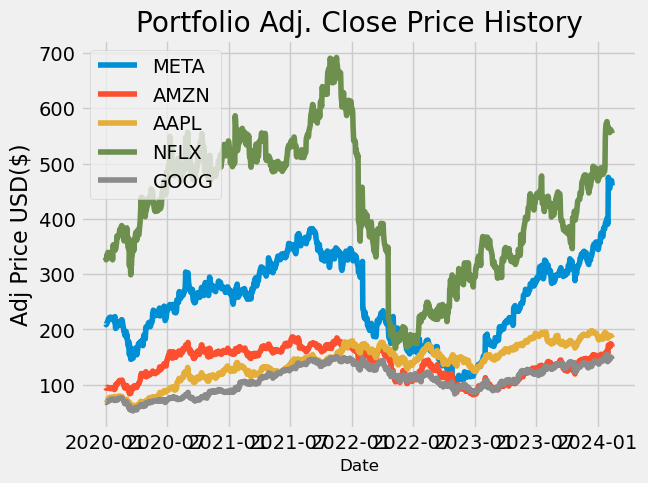

In [17]:
#Visually show the portfolio
title='Portfolio Adj. Close Price History'

#Get the stocks
my_stocks=df

#create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Adj Price USD($)',fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')

plt.show()

In [18]:
#Show daily simple return
returns=df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.005291,-0.012139,-0.009722,-0.011855,-0.004907
2020-01-06,0.018834,0.014886,0.007969,0.030469,0.024657
2020-01-07,0.002164,0.002092,-0.004704,-0.015127,-0.000624
2020-01-08,0.010138,-0.007809,0.016086,0.025729,0.007880
...,...,...,...,...,...
2024-02-07,0.032701,0.008158,0.000581,0.006152,0.008734
2024-02-08,0.000873,-0.004046,-0.005755,-0.001377,0.003682
2024-02-09,-0.004021,0.027143,0.004094,0.004995,0.020378


In [23]:
#Show the annualised covariance matrix
cov_matrix_annual=returns.cov()*252


exp_ret=returns.mean()*252
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.224320,0.109763,0.092983,0.114238,0.105164
AMZN,0.109763,0.140881,0.077423,0.099533,0.083363
AAPL,0.092983,0.077423,0.110737,0.075979,0.076159
NFLX,0.114238,0.099533,0.075979,0.234341,0.075135
GOOG,0.105164,0.083363,0.076159,0.075135,0.110970


In [24]:
exp_ret

META    0.304877
AMZN    0.210327
AAPL    0.281645
NFLX    0.248221
GOOG    0.240963
dtype: float64

In [10]:
#Calculate the portfolio variance
port_var = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_var

0.1650454950370135

In [11]:
#Calculate portfolio valatility/Std Dev

port_vol= np.sqrt(port_var)
port_vol

0.4062579168914909

In [12]:
#Calculate the annual portfolio return

port_ret= np.sum(returns.mean()*weights)*252
port_ret

0.3215083626963073

In [13]:
#Show the expected annual return, volatility(risk), variance

per_var= str(round(port_var,2)*100)+'%'
per_vol = str(round(port_vol,2)*100)+'%'
per_ret= str(round(port_ret,2)*100)+'%'

print('Expected Annual Return: '+per_ret)
print('Annual volatility/Risk:  '+per_vol)
print('Annual Variance: '+per_var)

Expected Annual Return: 32.0%
Annual volatility/Risk:  41.0%
Annual Variance: 17.0%


In [26]:
from scipy.optimize import minimize

In [27]:
def objective(weights, returns, cov_matrix_annual):
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_annual, weights)))
    return -portfolio_return / portfolio_volatility  # Minimize the negative of Sharpe ratio

# Define the constraint that the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Define the bounds for weights (each weight should be between 0 and 1)
bounds = tuple((0, 1) for asset in range(len(assets)))

# Initialize equal weights for each asset
initial_weights = [1. / len(assets) for asset in assets]

# Perform the optimization for maximum Sharpe ratio
result = minimize(objective, initial_weights, args=(returns, cov_matrix_annual),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimized weights
optimized_weights = result.x

# Display the optimized weights
print("Optimized Weights for Maximum Sharpe Ratio:")
for asset, weight in zip(assets, optimized_weights):
    print(f"{asset}: {weight:.4f}")

# Display the portfolio statistics
optimized_port_vol = np.sqrt(np.dot(optimized_weights.T, np.dot(cov_matrix_annual, optimized_weights)))
optimized_port_ret = np.sum(returns.mean() * optimized_weights) * 252
sharpe_ratio = -result.fun  # Negative because we minimized the negative of Sharpe ratio

print("\nOptimized Portfolio Statistics:")
print(f"Expected Return: {optimized_port_ret:.4f}")
print(f"Volatility: {optimized_port_vol:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Optimized Weights for Maximum Sharpe Ratio:
META: 0.0899
AMZN: 0.0000
AAPL: 0.6513
NFLX: 0.0577
GOOG: 0.2011

Optimized Portfolio Statistics:
Expected Return: 0.2736
Volatility: 0.3120
Sharpe Ratio: 0.8770
